In [3]:
import csv
import math
import random
import nltk
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import itertools
import collections
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
import networkx as nx
import warnings
from nltk import bigrams
from textblob import TextBlob
from pandas import DataFrame

In [4]:
import pandas as pd
cols = ['sentiment','tweet']
df = pd.read_excel('D:/Work/RahulGandhiData.xlsx',header = None,names = cols)
df.head(20)

,sentiment,tweet
0,0,mihirkotecha4wadala 2019 BJP WadalaVidhansabha...
1,1,RT More than 3 lacs people had already enrolle...
2,1,RT Dear I don t want to see bjp promoted tweet...
3,0,NCP MLA Vaibhav Pichad says he is going to joi...
4,0,Sonowal urges people to share responsibility w...
5,0,A day after it came to power in Karnataka the ...
6,0,RT JammuAndKashmir BJP National Working Presid...
7,1,RT The BJP govt has cut more than 1 crore tree...
8,1,why wolf trying to protect MuslimWomen Let us ...
9,0,Will India Bollywood Sports Celebrities Indust...


In [5]:
#number of words
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split(" ")))
df[['tweet','word_count']].head()

,tweet,word_count
0,mihirkotecha4wadala 2019 BJP WadalaVidhansabha...,6
1,RT More than 3 lacs people had already enrolle...,22
2,RT Dear I don t want to see bjp promoted tweet...,25
3,NCP MLA Vaibhav Pichad says he is going to joi...,11
4,Sonowal urges people to share responsibility w...,12


In [6]:
#number of characters
df['char_count'] = df['tweet'].str.len() ## this also includes spaces
df[['tweet','char_count']].head()

,tweet,char_count
0,mihirkotecha4wadala 2019 BJP WadalaVidhansabha...,54.0
1,RT More than 3 lacs people had already enrolle...,124.0
2,RT Dear I don t want to see bjp promoted tweet...,109.0
3,NCP MLA Vaibhav Pichad says he is going to joi...,51.0
4,Sonowal urges people to share responsibility w...,84.0


In [7]:
#to find the average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
df['tweet'] = df['tweet'].astype(str)
df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
df[['tweet','avg_word']].head()

,tweet,avg_word
0,mihirkotecha4wadala 2019 BJP WadalaVidhansabha...,8.166667
1,RT More than 3 lacs people had already enrolle...,4.681818
2,RT Dear I don t want to see bjp promoted tweet...,3.400000
3,NCP MLA Vaibhav Pichad says he is going to joi...,3.727273
4,Sonowal urges people to share responsibility w...,6.083333


In [8]:
#Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet'].head()

0    mihirkotecha4wadala 2019 BJP WadalaVidhansabha...
1    RT More 3 lacs people already enrolled BJP mem...
2    RT Dear I want see bjp promoted tweets TL It g...
3           NCP MLA Vaibhav Pichad says going join BJP
4    Sonowal urges people share responsibility arme...
Name: tweet, dtype: object

In [9]:
# Common word removal
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[:10]
freq

RT           15061
Congress      9730
BJP           7465
The           2490
amp           2474
go            2327
I             2100
India         1615
calling       1484
Karnataka     1467
dtype: int64

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(df['tweet'].values.astype('U')) ## Even astype(str) would work

<26719x17533 sparse matrix of type '<class 'numpy.float64'>'
	with 305530 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.model_selection import train_test_split
X = df.tweet
y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,random_state = 0)
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),(len(X_train[y_train == -1]) / (len(X_train)*1.))*100,(len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 18703 entries with 15.75% negative, 35.93% positive


In [13]:
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),(len(X_test[y_test == -1]) / (len(X_test)*1.))*100,(len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Test set has total 8016 entries with 15.09% negative, 35.59% positive


In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [15]:
import numpy as np
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score: 92.20%
Test result for 20000 features
accuracy score: 91.44%
Test result for 30000 features
accuracy score: 91.64%


              precision    recall  f1-score   support

    negative       0.94      0.80      0.86      1210
    positive       0.89      0.98      0.94      3953
     neutral       0.96      0.88      0.92      2853

    accuracy                           0.92      8016
   macro avg       0.93      0.89      0.91      8016
weighted avg       0.92      0.92      0.92      8016

accuracy score
0.9205339321357285


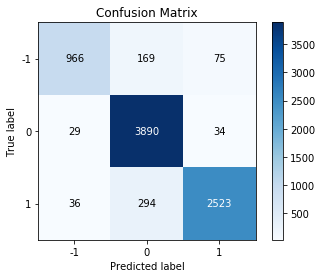

In [16]:
from sklearn.metrics import classification_report, accuracy_score
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', tfidf),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
df = print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

              precision    recall  f1-score   support

    negative       1.00      0.99      0.99      2945
    positive       0.99      1.00      1.00      9038
     neutral       1.00      0.99      1.00      6720

    accuracy                           1.00     18703
   macro avg       1.00      0.99      0.99     18703
weighted avg       1.00      1.00      1.00     18703

accuracy score
0.9951344704058173


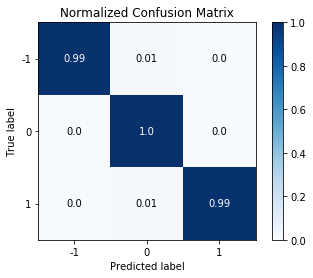

In [17]:
from sklearn.metrics import classification_report, accuracy_score
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', tfidf),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_train)
df = print(classification_report(y_train, y_pred, target_names=['negative','positive','neutral']))
print("accuracy score")
print(accuracy_score(y_train, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train, y_pred, normalize=True)
plt.show()

              precision    recall  f1-score   support

    negative       0.91      0.63      0.75      1210
    positive       0.82      0.95      0.88      3953
     neutral       0.89      0.80      0.84      2853

    accuracy                           0.85      8016
   macro avg       0.87      0.80      0.82      8016
weighted avg       0.86      0.85      0.85      8016

accuracy score
0.8512974051896207


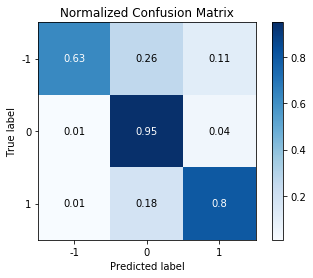

In [25]:
from sklearn.metrics import classification_report, accuracy_score
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
nb =MultinomialNB()
pipeline = Pipeline([
        ('vectorizer', tfidf),
        ('classifier', nb)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
df = print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

              precision    recall  f1-score   support

    negative       0.91      0.63      0.75      1210
    positive       0.82      0.95      0.88      3953
     neutral       0.89      0.80      0.84      2853

    accuracy                           0.85      8016
   macro avg       0.87      0.80      0.82      8016
weighted avg       0.86      0.85      0.85      8016

accuracy score
0.8512974051896207


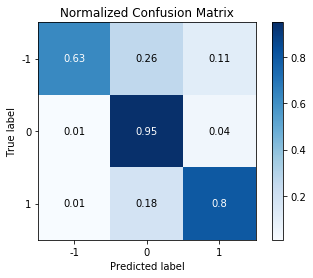

In [22]:
from sklearn.metrics import classification_report, accuracy_score
nb = MultinomialNB()
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', tfidf),
        ('classifier', nb)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
df = print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

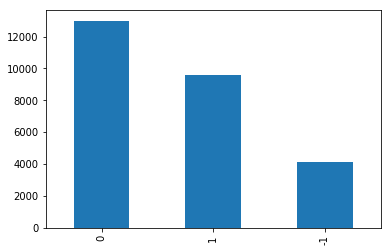

In [61]:
import pandas as pd
cols = ['sentiment','tweet']
df = pd.read_excel('D:/Work/RahulGandhiData.xlsx',header = None,names = cols)
df.head(20)
import numpy as np

#df['Polarity'] = np.where(df['sentiment']==1,1,-1)

df['sentiment'].value_counts().plot(kind='bar')

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [52]:
cv = CountVectorizer()
svc = SVC()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy score: 49.31%
Test result for 20000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy score: 49.31%
Test result for 30000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy score: 49.31%


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1210
    positive       0.54      1.00      0.71      3953
     neutral       1.00      0.27      0.42      2853

    accuracy                           0.59      8016
   macro avg       0.51      0.42      0.38      8016
weighted avg       0.62      0.59      0.50      8016

accuracy score
0.5876996007984032


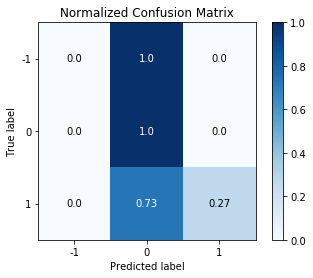

In [56]:
from sklearn.metrics import classification_report,accuracy_score
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', svc)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
#from sklearn.metrics import classification_report, 
 
#print(confusion_matrix(y_test,y_pred,target_names=['negative','positive','neutral']))  
#print(classification_report(y_test,predictions)) 
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [31]:
cv = CountVectorizer()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
accuracy score: 92.44%
Test result for 20000 features
accuracy score: 93.24%
Test result for 30000 features
accuracy score: 93.49%


              precision    recall  f1-score   support

    negative       0.83      0.87      0.85      1210
    positive       0.95      0.95      0.95      3953
     neutral       0.95      0.92      0.93      2853

    accuracy                           0.93      8016
   macro avg       0.91      0.92      0.91      8016
weighted avg       0.93      0.93      0.93      8016

accuracy score
0.9281437125748503


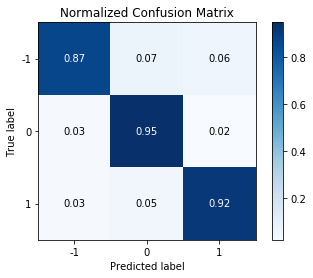

In [34]:
from sklearn.metrics import classification_report,accuracy_score
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', svc)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
#from sklearn.metrics import classification_report, 
 
#print(confusion_matrix(y_test,y_pred,target_names=['negative','positive','neutral']))  
#print(classification_report(y_test,predictions)) 
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


null accuracy: 50.69%
accuracy score: 93.05%
model is 42.37% more accurate than null accuracy
train and test time: 1.67%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.69%
accuracy score: 93.35%
model is 42.66% more accurate than null accuracy
train and test time: 1.82%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.69%
accuracy score: 93.26%
model is 42.58% more accurate than null accuracy
train and test time: 1.72%
--------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_wei

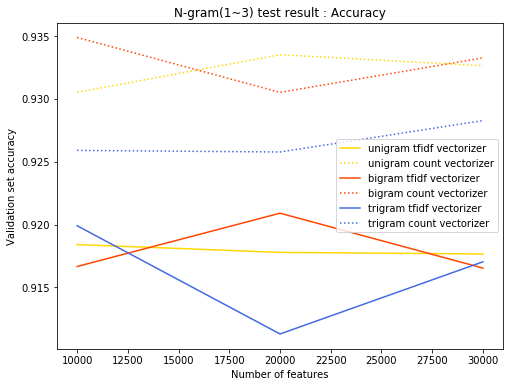

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [28]:
import pandas as pd
cols = ['sentiment','tweet']
df = pd.read_excel('D:/Work/RahulGandhiData.xlsx',header = None,names = cols)
df.head(20)

,sentiment,tweet
0,0,mihirkotecha4wadala 2019 BJP WadalaVidhansabha...
1,1,RT More than 3 lacs people had already enrolle...
2,1,RT Dear I don t want to see bjp promoted tweet...
3,0,NCP MLA Vaibhav Pichad says he is going to joi...
4,0,Sonowal urges people to share responsibility w...
5,0,A day after it came to power in Karnataka the ...
6,0,RT JammuAndKashmir BJP National Working Presid...
7,1,RT The BJP govt has cut more than 1 crore tree...
8,1,why wolf trying to protect MuslimWomen Let us ...
9,0,Will India Bollywood Sports Celebrities Indust...


In [48]:
from sklearn.model_selection import train_test_split
X = df.tweet
y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,random_state = 0)
T = len(X_test[y_test == 0]) / (len(X_test)*1.)
T

0.4931387225548902

In [49]:
len(X_test)

8016

In [72]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [73]:
accuracy_summary(sentiment_fit,X_train, y_train, X_test, y_test)

ValueError: np.nan is an invalid document, expected byte or unicode string.

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.69%
accuracy score: 86.48%
model is 35.79% more accurate than null accuracy
train and test time: 1.25%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.69%
accuracy score: 87.14%
model is 36.45% more accurate than null accuracy
train and test time: 0.54%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.69%
accuracy score: 87.14%
model is 36.45% more accurate than null accuracy
train and test time: 0.40%
--------------------------------------------------------------------------------
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.69%
accuracy score: 84.18%
model is 33.50% more accurate than null accuracy
train and test time: 0.95%
---------------------------

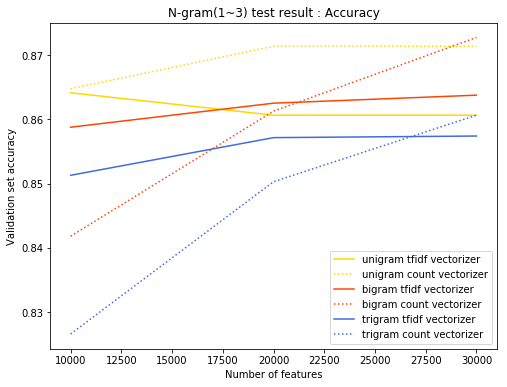

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
null accuracy: 50.69%
accuracy score: 94.75%
model is 44.06% more accurate than null accuracy
train and test time: 40.53%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.69%
accuracy score: 94.94%
model is 44.25% more accurate than null accuracy
train and test time: 50.40%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.69%
accuracy score: 94.94%
model is 44.25% more accurate than null accuracy
train and test time: 50.71%
--------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight='balance

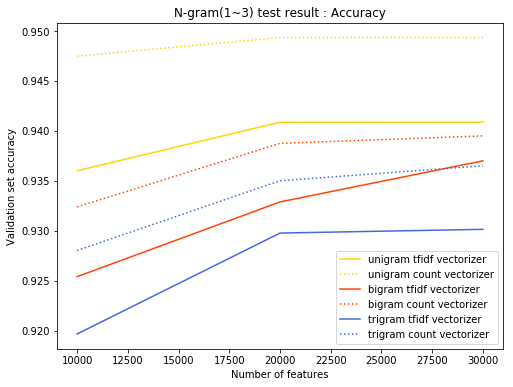

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "RandomForestClassifier","Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),RandomForestClassifier(class_weight="balanced"),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,clf_accuracy,tt_time))
    return result

trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 50.69%
accuracy score: 88.96%
model is 38.27% more accurate than null accuracy
train and test time: 3.60%
--------------------------------------------------------------------------------
Validation result for RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


null accuracy: 50.69%
accuracy score: 89.93%
model is 39.25% more accurate than null accuracy
train and test time: 6.76%
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
null accuracy: 50.69%
accuracy score: 93.69%
model is 43.00% more accurate than null accuracy
train and test time: 3.45%
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercep

In [185]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf21 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1),('rf', clf2), ('svc', clf21), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2,clf21, clf3, clf4, clf5, eclf], ['Logistic Regression','Random Forest', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=100000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print ("Validation result for {}".format(label))
    print (clf)
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 50.69%
accuracy score: 88.96%
model is 38.27% more accurate than null accuracy
train and test time: 4.11%
--------------------------------------------------------------------------------
Validation result for Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


null accuracy: 50.69%
accuracy score: 90.32%
model is 39.63% more accurate than null accuracy
train and test time: 6.28%
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
null accuracy: 50.69%
accuracy score: 93.69%
model is 43.00% more accurate than null accuracy
train and test time: 3.08%
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null accuracy: 50.69%
accuracy score: 86.43%
model is 35.74% more accurate than null accuracy
train and test time: 2.16%
--------------------------------------------------------------------------------
Validation result for Ridge Classif

C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 50.69%
accuracy score: 92.85%
model is 42.17% more accurate than null accuracy
train and test time: 12.61%
--------------------------------------------------------------------------------


In [186]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
def build_lda(X_train, num_topics=50):
    vec = CountVectorizer()
    transformed_X_train = vec.fit_transform(X_train)
    feature_names = vec.get_feature_names()
    lda = LatentDirichletAllocation(
        n_components=num_topics, max_iter=5, 
        learning_method='online', random_state=0)
    lda.fit(transformed_X_train)
    return lda, vec, feature_names

def display_word_distribution(model, feature_names, n_word):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-n_word - 1:-1]:
            words.append(feature_names[i])
        print(words)
lda_model, vec, feature_names = build_lda(X_train)
display_word_distribution(
    model=lda_model, feature_names=feature_names, 
    n_word=5)

Topic 0:
['with', 'congress', 'get', 'had', 'in']
Topic 1:
['to', 'congress', 'the', 'of', 'and']
Topic 2:
['me', 'democracy', 'isro', 'to', '30']
Topic 3:
['the', 'of', 'be', 'who', 'so']
Topic 4:
['video', 'own', 'link', '12', 'adopted']
Topic 5:
['the', 'of', 'rt', 'bjp', 'on']
Topic 6:
['out', 'election', '2019', 'bjp', 'high']
Topic 7:
['go', 'or', 'by', 'an', 'was']
Topic 8:
['congress', 'and', 'would', 'for', 'rt']
Topic 9:
['muslims', 'fake', 'attacks', 'sheiladikshit', 'of']
Topic 10:
['every', 'member', 'congress', 'loss', 'demand']
Topic 11:
['am', 'ruling', 'acts', 'veteran', 'agree']
Topic 12:
['are', 'world', 'most', 'mr', 'behind']
Topic 13:
['gt', 'rajyasabha', 'thursday', 'pa', 'karnatakaassembly']
Topic 14:
['the', 'of', 'power', 'sir', 'man']
Topic 15:
['rt', 'congress', 'to', 'their', 'the']
Topic 16:
['to', 'amp', 'you', 'and', 'up']
Topic 17:
['our', 'if', 'is', 'rt', 'while']
Topic 18:
['reps', 'false', 'drug', 'opinion', 'showing']
Topic 19:
['for', 'her', 'afte

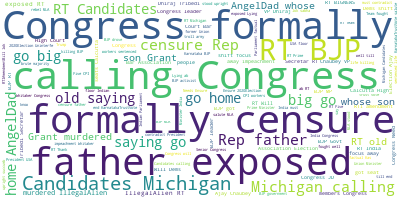

In [66]:
import pandas as pd
cols = ['sentiment','tweet']
df = pd.read_excel('D:/Work/RahulGandhiData.xlsx',header = 0,names = cols)
df.head()
df['tweet'] = df['tweet'].astype(str)
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['tweet'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

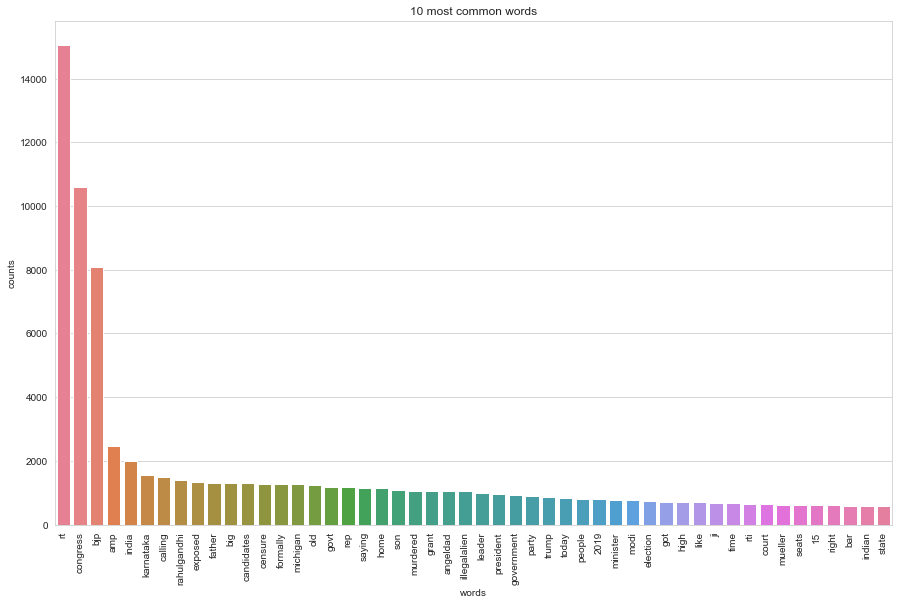

In [67]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['tweet'])
# Visualise the 10 most common words
plot_50_most_common_words(count_data, count_vectorizer)

In [189]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
narendramodi rt pm modi amitshah jai power money democracy finally

Topic #1:
narendramodi pm rt modi india pmoindia amitshah book sabha politics

Topic #2:
narendramodi rt bjp president said media liar called time li

Topic #3:
rt narendramodi minister prime lie august red occasion 15th white

Topic #4:
narendramodi rt pm india kashmir donaldtrump piyushgoyal modi request prime


In [190]:
import gensim
from gensim import corpora
from gensim import models
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel,TfidfModel
from gensim.models.wrappers import LdaMallet
mydict = corpora.Dictionary([simple_preprocess(words) for words in X_train])
corpus = [mydict.doc2bow(simple_preprocess(words)) for words in X_train]
ldamodel = LdaModel(corpus=corpus, num_topics=50, id2word=mydict)

In [191]:
import pyLDAvis.gensim

In [192]:
pyLDAvis.enable_notebook()

In [193]:
pyLDAvis.gensim.prepare(ldamodel, corpus, mydict)

C:\Users\raghu\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
20    -0.059563 -0.326629       1        1  5.501812
27    -0.185268  0.079787       2        1  5.027491
11     0.141056 -0.037637       3        1  3.162926
29    -0.289506 -0.031131       4        1  2.864307
7      0.168447 -0.002229       5        1  2.809462
5     -0.040965  0.172353       6        1  2.633335
40     0.037052 -0.034635       7        1  2.603523
15    -0.011564  0.052494       8        1  2.520178
3      0.109206 -0.017455       9        1  2.300777
33     0.066747 -0.021834      10        1  2.269205
31     0.060146  0.003399      11        1  2.267602
9     -0.148558 -0.059475      12        1  2.238573
46    -0.045254  0.062593      13        1  2.207218
21     0.049675  0.049314      14        1  2.161756
4      0.106530 -0.022603      15        1  2.149446
35    -0.018836  0.144627      16        1  2.060587
1      0.043495 -0.038433      17        1  2.059223
39    -0.007631  0.009833      18        1  2.040804
44    -0.017209  0.105911      19        1  2.014780
6      0.081011 -0.000778      20        1  2.008863
22     0.018105 -0.043061      21        1  1.966166
12    -0.110751  0.072704      22        1  1.953584
19    -0.044520  0.089245      23        1  1.932014
37    -0.016006 -0.132345      24        1  1.918297
14    -0.033937  0.001142      25        1  1.891391
34    -0.098525  0.017368      26        1  1.831398
26     0.038260  0.057136      27        1  1.804792
17     0.041162  0.016172      28        1  1.746264
48     0.077286 -0.095319      29        1  1.713169
25    -0.015071 -0.041267      30        1  1.708701
10     0.055564 -0.000592      31        1  1.685052
49    -0.112762  0.048997      32        1  1.665568
28     0.088316 -0.025519      33        1  1.661488
47     0.110213  0.021168      34        1  1.658775
23     0.054354  0.003467      35        1  1.646255
32     0.092184  0.015276      36        1  1.633164
24    -0.030623  0.097564      37        1  1.582217
8      0.127196  0.041466      38        1  1.580829
0      0.080853 -0.018711      39        1  1.567698
18     0.015266  0.082646      40        1  1.536763
16    -0.093295 -0.013839      41        1  1.506031
42     0.027989  0.040171      42        1  1.504785
36     0.062628 -0.048495      43        1  1.483284
13    -0.087390  0.004429      44        1  1.425113
41    -0.034877 -0.007195      45        1  1.317359
43    -0.001595  0.067944      46        1  1.302676
30    -0.050773  0.039668      47        1  1.284125
45    -0.118613 -0.102704      48        1  0.945126
38     0.011486 -0.114659      49        1  0.889206
2     -0.091136 -0.160331      50        1  0.756846, topic_info=     Category          Freq         Term         Total  loglift  logprob
94    Default   1956.000000          her   1956.000000  30.0000  30.0000
132   Default   1589.000000           go   1589.000000  29.0000  29.0000
59    Default  12362.000000          the  12362.000000  28.0000  28.0000
23    Default   5165.000000          for   5165.000000  27.0000  27.0000
30    Default   9361.000000           to   9361.000000  26.0000  26.0000
55    Default   6682.000000           of   6682.000000  25.0000  25.0000
421   Default   1483.000000          was   1483.000000  24.0000  24.0000
45    Default   5849.000000          bjp   5849.000000  23.0000  23.0000
1     Default   7637.000000     congress   7637.000000  22.0000  22.0000
320   Default   1998.000000          you   1998.000000  21.0000  21.0000
88    Default   1018.000000      calling   1018.000000  20.0000  20.0000
89    Default    875.000000   candidates    875.000000  19.0000  19.0000
87    Default   2731.000000          are   2731.000000  18.0000  18.0000
90    Default    866.000000      censure    866.000000  17.0000  17.0000
92    Default    886.000000       father    886.000000  16.0000  16.0000
93    Default    864.000000     f

C:\Users\raghu\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Positive words


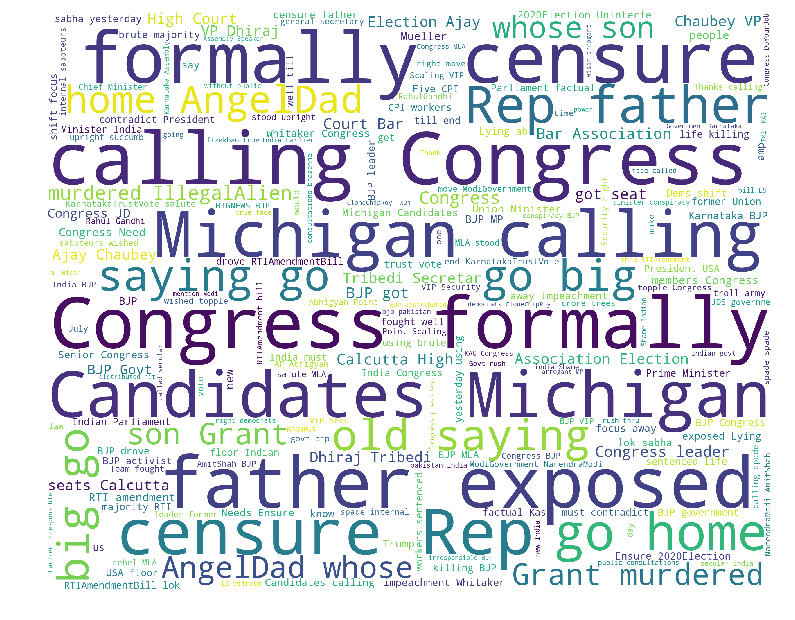

Negative words


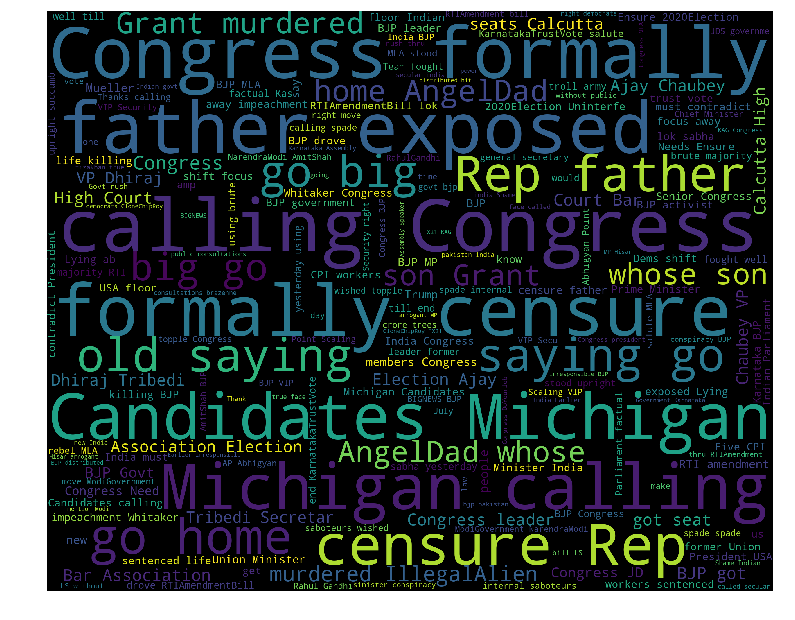

In [68]:
from nltk.corpus import stopwords
chachedWords = stopwords.words('english')
from nltk.corpus import stopwords

data = df[['sentiment','tweet']]

# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.3)
# Removing neutral sentiments
train = train[train.sentiment != "0"]

train_pos = train[ train['sentiment'] == '1']
train_pos = train['tweet']
train_neg = train[ train['sentiment'] == '-1']
train_neg = train['tweet']



def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords = chachedWords,background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [195]:
mydict = corpora.Dictionary([simple_preprocess(words) for words in X_train])
corpus = [mydict.doc2bow(simple_preprocess(words)) for words in X_train]

from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.14635945909736825),
 (1, 0.046367291193908804),
 (2, 0.24020339208851132),
 (3, 0.2688652460779651),
 (4, 0.1804159938656858),
 (5, 0.15890780418412864),
 (6, 0.26490834052996975),
 (7, 0.30963318303718085),
 (8, 0.17074079766763814),
 (9, 0.19253930083295578),
 (10, 0.19948960846818534),
 (11, 0.19087999031446662),
 (12, 0.31651851397580444),
 (13, 0.16414850679828605),
 (14, 0.14277834453844737),
 (15, 0.22849169851151443),
 (16, 0.027823189634236942),
 (17, 0.3267946823271485),
 (18, 0.2695575635837615),
 (19, 0.31651851397580444)]


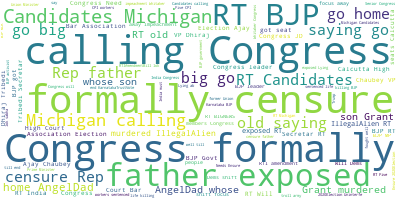

In [196]:
import pandas as pd
cols = ['sentiment','tweet']
df = pd.read_excel('D:\Work\RahulGandhiData.xlsx',header = None,names = cols)
df.head(20)
df['tweet'] = df['tweet'].astype(str)
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['tweet'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [197]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == '1']
test_pos = test_pos['tweet']
test_neg = test[ test['sentiment'] == '-1']
test_neg = test_neg['tweet']


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords = chachedWords,background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [198]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

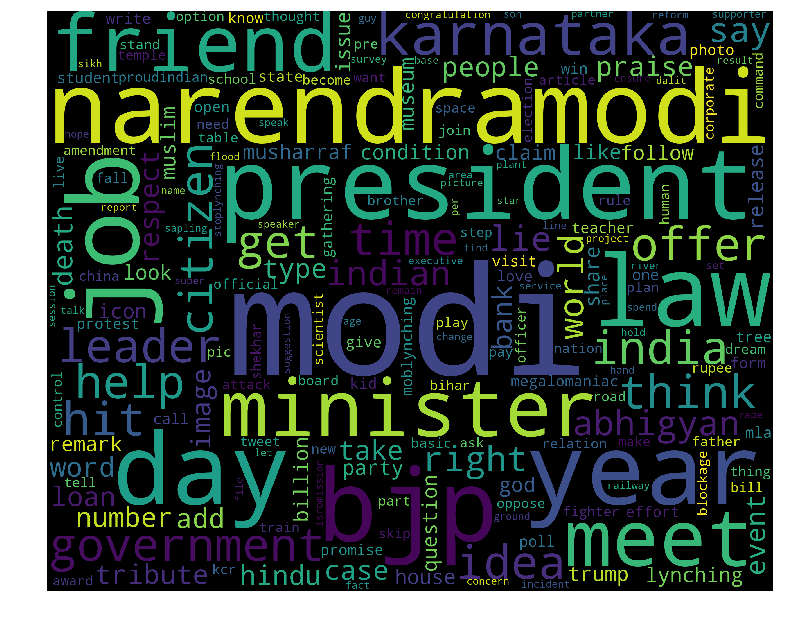

In [199]:
wordcloud_draw(w_features)

In [200]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [201]:
import numpy as np
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tf = TfidfVectorizer(input='X_train', analyzer='word', ngram_range=(1,3),
                     min_df = 0, stop_words = 'english', sublinear_tf=True,smooth_idf=False)
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score: 90.91%
Test result for 20000 features
accuracy score: 90.42%
Test result for 30000 features
accuracy score: 90.46%


In [202]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))

              precision    recall  f1-score   support

    negative       0.94      0.80      0.86      1210
    positive       0.89      0.98      0.94      3953
     neutral       0.97      0.89      0.93      2853

    accuracy                           0.92      8016
   macro avg       0.93      0.89      0.91      8016
weighted avg       0.92      0.92      0.92      8016



In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [14]:
import numpy as np
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tf = TfidfVectorizer(input='X_train', analyzer='word', ngram_range=(1,3),
                     min_df = 1, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score: 91.12%
Test result for 20000 features
accuracy score: 90.23%
Test result for 30000 features
accuracy score: 89.80%


In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [17]:
import numpy as np
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tf = TfidfVectorizer(input='X_train', analyzer='word', ngram_range=(1,3),
                     min_df =1, stop_words = 'english', use_idf = True,sublinear_tf=True,smooth_idf=False)
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score: 91.22%
Test result for 20000 features
accuracy score: 89.95%
Test result for 30000 features
accuracy score: 90.77%


In [204]:
import numpy as np
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tf = TfidfVectorizer(input='X_train', analyzer='word', ngram_range=(1,3),
                     min_df = 0, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score: 91.07%
Test result for 20000 features
accuracy score: 90.72%
Test result for 30000 features
accuracy score: 90.72%


In [205]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))

              precision    recall  f1-score   support

    negative       0.93      0.81      0.87      1210
    positive       0.89      0.98      0.94      3953
     neutral       0.97      0.89      0.92      2853

    accuracy                           0.92      8016
   macro avg       0.93      0.89      0.91      8016
weighted avg       0.92      0.92      0.92      8016



RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


null accuracy: 50.69%
accuracy score: 91.65%
model is 40.97% more accurate than null accuracy
train and test time: 2.02%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.69%
accuracy score: 91.90%
model is 41.22% more accurate than null accuracy
train and test time: 2.03%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.69%
accuracy score: 92.08%
model is 41.39% more accurate than null accuracy
train and test time: 2.18%
--------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_wei

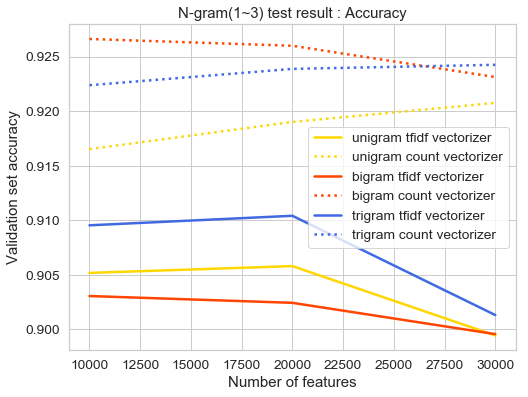

In [206]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.69%
accuracy score: 86.48%
model is 35.79% more accurate than null accuracy
train and test time: 0.41%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.69%
accuracy score: 87.14%
model is 36.45% more accurate than null accuracy
train and test time: 0.40%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.69%
accuracy score: 87.14%
model is 36.45% more accurate than null accuracy
train and test time: 0.41%
--------------------------------------------------------------------------------
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.69%
accuracy score: 84.18%
model is 33.50% more accurate than null accuracy
train and test time: 0.97%
---------------------------

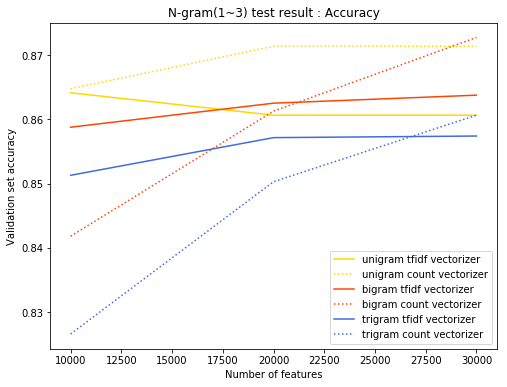

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


null accuracy: 50.69%
accuracy score: 92.63%
model is 41.94% more accurate than null accuracy
train and test time: 2.02%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.69%
accuracy score: 90.81%
model is 40.12% more accurate than null accuracy
train and test time: 2.00%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.69%
accuracy score: 91.39%
model is 40.71% more accurate than null accuracy
train and test time: 2.04%
--------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_wei

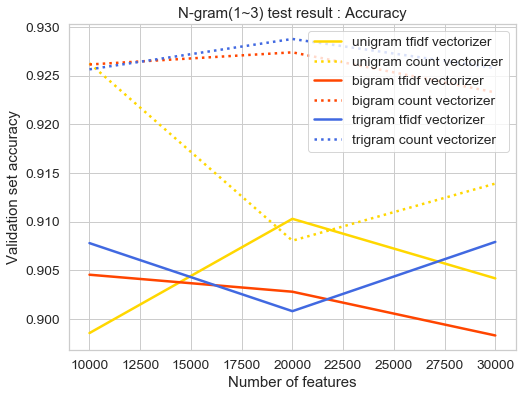

In [207]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=True,smooth_idf=False)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [208]:
#Naive Bayes Classifier:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [209]:
import numpy as np
cv = CountVectorizer()
nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tf = TfidfVectorizer(input='X_train', analyzer='word', ngram_range=(1,3),
                     min_df = 0, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
accuracy score: 84.32%
Test result for 20000 features
accuracy score: 85.07%
Test result for 30000 features
accuracy score: 85.39%


In [210]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))

              precision    recall  f1-score   support

    negative       0.94      0.81      0.87      1210
    positive       0.90      0.99      0.94      3953
     neutral       0.97      0.89      0.93      2853

    accuracy                           0.93      8016
   macro avg       0.94      0.90      0.91      8016
weighted avg       0.93      0.93      0.92      8016



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.69%
accuracy score: 86.48%
model is 35.79% more accurate than null accuracy
train and test time: 0.71%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.69%
accuracy score: 87.14%
model is 36.45% more accurate than null accuracy
train and test time: 0.47%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.69%
accuracy score: 87.14%
model is 36.45% more accurate than null accuracy
train and test time: 0.40%
--------------------------------------------------------------------------------
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.69%
accuracy score: 84.18%
model is 33.50% more accurate than null accuracy
train and test time: 0.93%
---------------------------

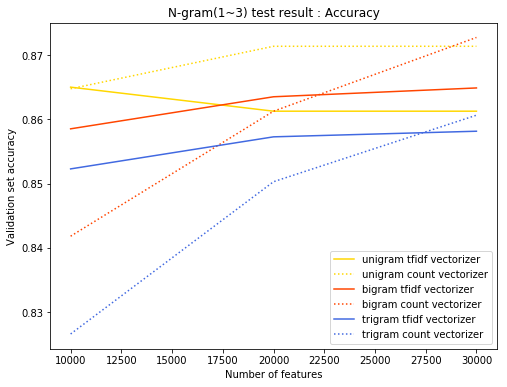

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt


def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=True,smooth_idf=False)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
null accuracy: 50.69%
accuracy score: 94.75%
model is 44.06% more accurate than null accuracy
train and test time: 38.61%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.69%
accuracy score: 94.94%
model is 44.25% more accurate than null accuracy
train and test time: 47.54%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.69%
accuracy score: 94.94%
model is 44.25% more accurate than null accuracy
train and test time: 47.24%
--------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight='balance

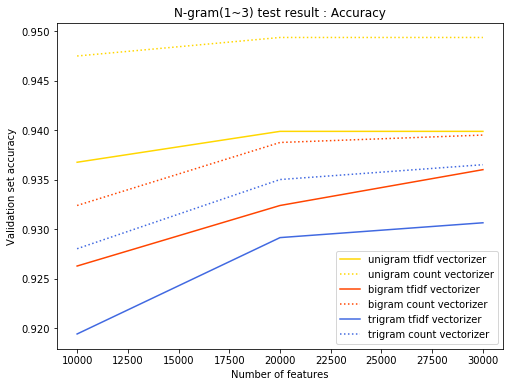

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt


def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=True,smooth_idf=False)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [213]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from time import time


def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
    else:
        null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
cvec = CountVectorizer()
#lr = LogisticRegression()
nb = MultinomialNB()
n_features = np.arange(10000,100001,10000)
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english',ngram_range=(1, 3))

RESULT FOR UNIGRAM WITHOUT STOP WORDS

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Validation result for 10000 features
null accuracy: 50.69%
accuracy score: 82.45%
model is 31.76% more accurate than null accuracy
train and test time: 1.57s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.69%
accuracy score: 84.54%
model is 33.86% more accurate than null accuracy
train and test time: 1.49s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.69%
accuracy score: 85.80%
model is 35.12% more accurate than null accuracy
train and test time: 1.44s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.69%
accuracy score: 86.70%
model is 36.02% more accurate than null accuracy
train and test time: 1.59s
-------------------------

In [214]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', nb)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))

              precision    recall  f1-score   support

    negative       0.53      0.86      0.66      1210
    positive       0.88      0.84      0.86      3953
     neutral       0.91      0.74      0.81      2853

    accuracy                           0.80      8016
   macro avg       0.77      0.81      0.78      8016
weighted avg       0.84      0.80      0.81      8016



In [215]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

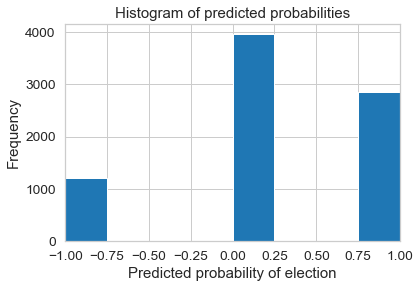

In [217]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_test, bins=8)

# x-axis limit from 0 to 1
plt.xlim(-1,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of election')
plt.ylabel('Frequency')

In [218]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from time import time


def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
    else:
        null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
cvec = CountVectorizer()
#lr = LogisticRegression()
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,100001,10000)
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english',ngram_range=(1, 3))#Very slow execution.

RESULT FOR UNIGRAM WITHOUT STOP WORDS

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Validation result for 10000 features
null accuracy: 50.69%
accuracy score: 90.99%
model is 40.31% more accurate than null accuracy
train and test time: 45.27s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.69%
accuracy score: 91.99%
model is 41.30% more accurate than null accuracy
train and test time: 52.61s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.69%
accuracy score: 92.25%
model is 41.57% more accurate than null accuracy
train and test time: 61.50s
------------------------------------------------------------------------

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
null accuracy: 15.09%
accuracy score: 96.16%
model is 81.06% more accurate than null accuracy
train and test time: 50.73s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 15.09%
accuracy score: 96.11%
model is 81.01% more accurate than null accuracy
train and test time: 62.84s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 15.09%
accuracy score: 96.11%
model is 81.01% more accurate than null accuracy
train and test time: 62.28s
--------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight='balance

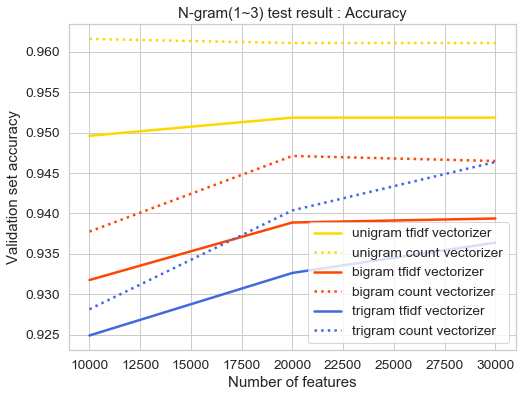

In [219]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
    else:
        null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=True,smooth_idf=False)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
null accuracy: 50.69%
accuracy score: 94.75%
model is 44.06% more accurate than null accuracy
train and test time: 60.70s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.69%
accuracy score: 94.94%
model is 44.25% more accurate than null accuracy
train and test time: 60.77s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.69%
accuracy score: 94.94%
model is 44.25% more accurate than null accuracy
train and test time: 63.80s
--------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight='balance

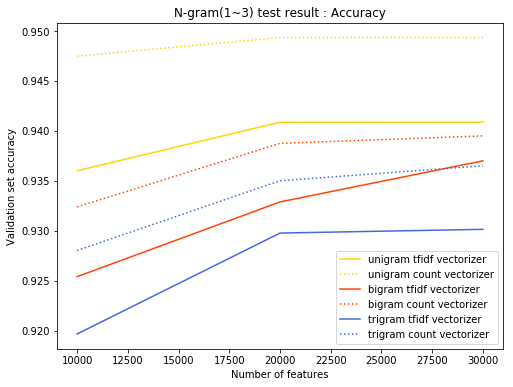

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
    else:
        null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
null accuracy: 50.69%
accuracy score: 94.75%
model is 44.06% more accurate than null accuracy
train and test time: 38.34s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.69%
accuracy score: 94.94%
model is 44.25% more accurate than null accuracy
train and test time: 47.63s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.69%
accuracy score: 94.94%
model is 44.25% more accurate than null accuracy
train and test time: 46.95s
--------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight='balance

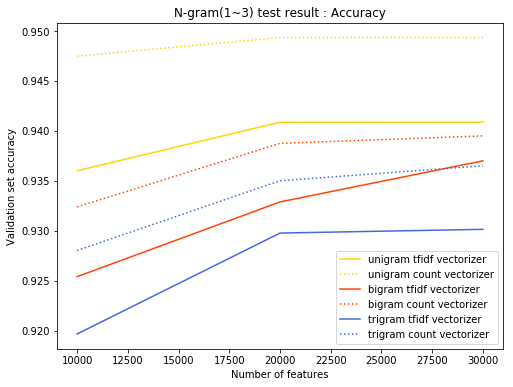

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
    else:
        null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()